In [31]:
import torch
from torch import nn
from torch import optim
import gym
import matplotlib.pyplot as plt


##### Example 1

In [5]:
env = gym.make('CartPole-v1')

In [6]:
class DeepQNetwork(nn.Module):
    def __init__(self, n_observations, n_actions):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_observations, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, n_actions),
        )
    
    def forward(self, x):
        return self.model(x)

In [11]:
n_actions = env.action_space.n
n_observations = env.observation_space.shape[0]

In [12]:
model = DeepQNetwork(n_observations=n_observations, n_actions=n_actions)

In [18]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [49]:
num_episodes = 1000
GAMMA = 0.9
losses = []

In [50]:
for i_episode in range(num_episodes):
    observation, _ = env.reset()
    observation = torch.from_numpy(observation)
    
    in_progress = True
    
    while in_progress:
                
        predicted_reward = model(observation)
        action = torch.argmax(predicted_reward, dim=-1).item()
        new_observation, reward, terminated, truncated, info = env.step(action)
        new_observation = torch.from_numpy(new_observation)
        
        predicted_next_reward = model(new_observation)
        
        max_predicted_next_reward = torch.max(predicted_next_reward, dim=-1)
        target_reward = reward + GAMMA * max_predicted_next_reward[0]
        loss = loss_func(target_reward, predicted_reward[action])
        
        loss_np = loss.detach().numpy() # can be ignore
        losses.append(loss_np)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        if terminated == True:
            in_progress = False

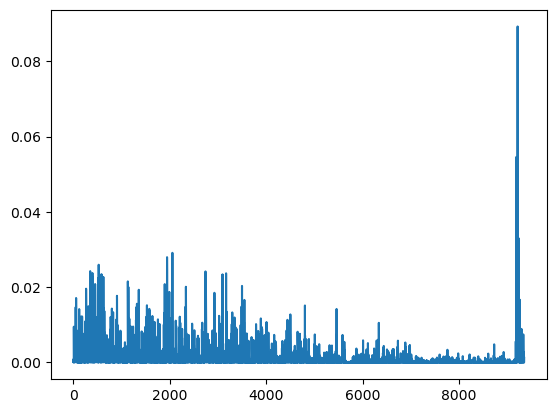

In [56]:
plt.plot(losses)
plt.show()

In [54]:
from itertools import count


In [43]:
count()

count(0)